In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


import seaborn as sn


import matplotlib.pyplot as plt


df=pd.read_csv('../../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

In [2]:
df_stats=df[['Mes', 'Edad', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion','Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'Mortal', 'IdPronostico', 'Costa']]

In [3]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 14 columns):
Mes                5468 non-null float64
Edad               4510 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Presion            5468 non-null float64
Dir_viento         5463 non-null float64
V_Viento           5468 non-null int64
Nubosidad          5468 non-null float64
ProfNievecm        4218 non-null float64
Mortal             5468 non-null int64
IdPronostico       5468 non-null int64
Costa              5468 non-null int64
dtypes: float64(10), int64(4)
memory usage: 598.2 KB


In [4]:
#df_stats = df_stats[(df_stats['Mes'].between(6,9))]
df_stats = df_stats[(df_stats['Mes'].between(7,9))]

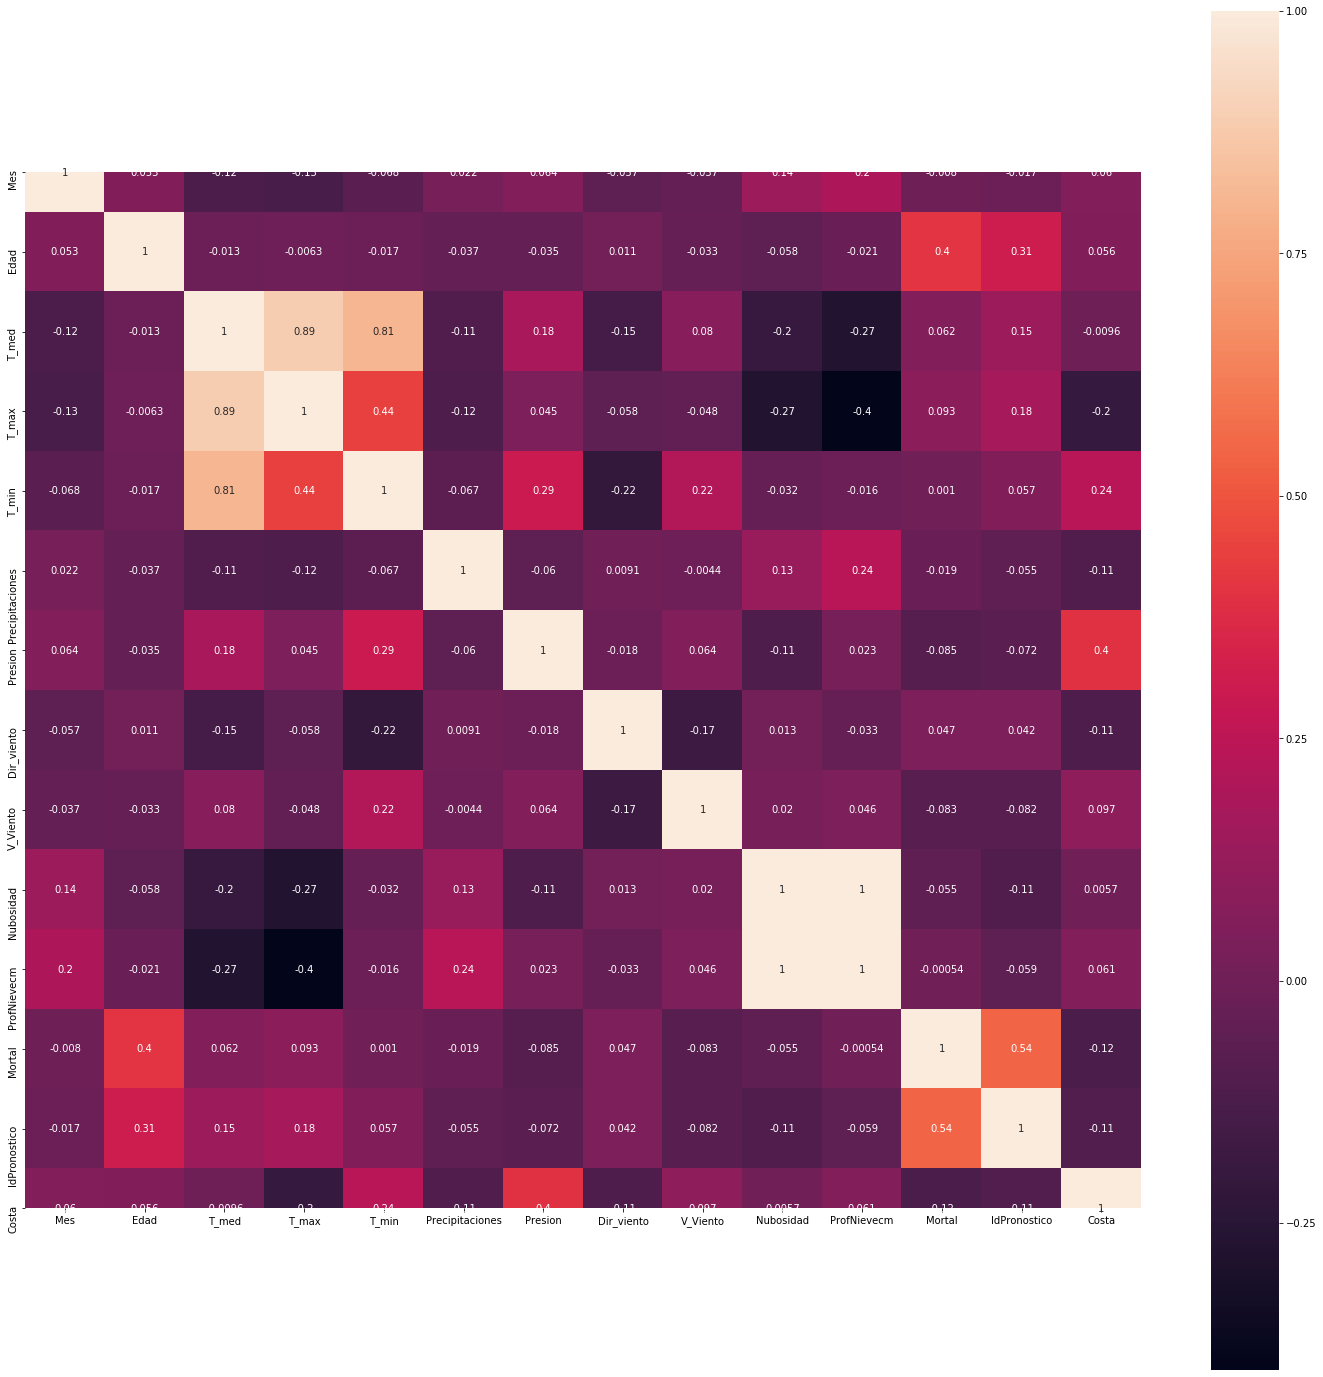

In [5]:
plt.figure(figsize=(25,25))

corrMatrix = df_stats.corr()
sn.heatmap(corrMatrix, annot=True, square=True)
plt.show()

In [6]:
c = corrMatrix.abs()
s = c.unstack()
so = s.sort_values(ascending=False , kind="quicksort")

In [7]:
so=so.to_frame() 

In [8]:
so.reset_index(inplace=True)

In [9]:
so.columns = ['Variable1', 'Variable2', 'correlacion']

In [10]:
so=so[so.Variable1 != so.Variable2]

In [11]:
so=so.drop_duplicates(subset=['correlacion'])

In [12]:
so.reset_index(inplace=True)

In [13]:
so.head(n=50)


,index,Variable1,Variable2,correlacion
0,11,Nubosidad,ProfNievecm,1.000000
1,16,T_med,T_max,0.886709
2,18,T_med,T_min,0.805823
3,20,IdPronostico,Mortal,0.541009
4,22,T_max,T_min,0.440893
5,24,Edad,Mortal,0.404656
6,26,T_max,ProfNievecm,0.401332
7,28,Costa,Presion,0.395948
8,30,IdPronostico,Edad,0.307704
9,32,Presion,T_min,0.294460
